LINEAR REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
features = data.columns

print("List of Features:")
for feature in features:
    print(feature)

List of Features:
id
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke


In [ ]:
# Select features and target variable
X = data[['heart_disease', 'age', 'hypertension']]
y = data['stroke']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.05245529591195058
R-squared: 0.07949063683975466


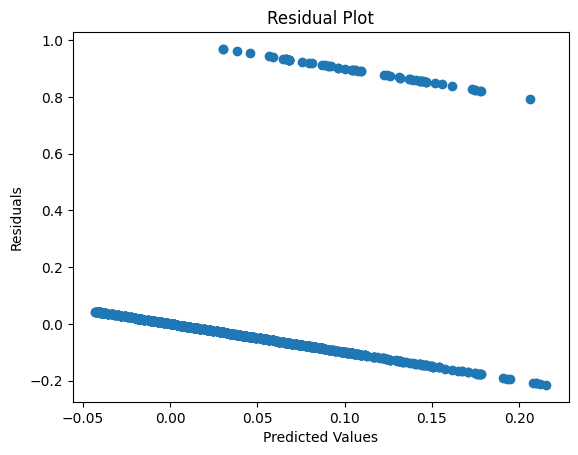

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on scaled features
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.06411552 0.04899612 0.0630148  0.07219695 0.05338108]


LOGISTIC REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
#Select the features and target
X = data[['hypertension', 'avg_glucose_level', 'heart_disease']]
y = data['stroke']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


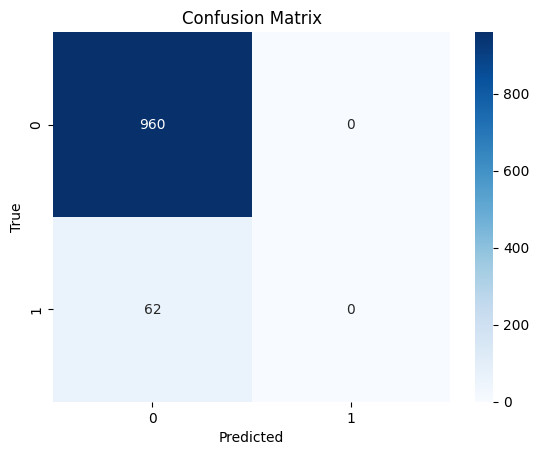

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

K-NEAREST NEIGHBOURS (KNN):

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
# Load the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
# Select features and target variable
X = data[['hypertension', 'heart_disease', 'age']]
y = data['stroke']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the KNN classifier
k = 3  # Choose an appropriate value for K
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Mean Squared Error:", mse)

Accuracy: 0.9334637964774951
Mean Squared Error: 0.06653620352250489


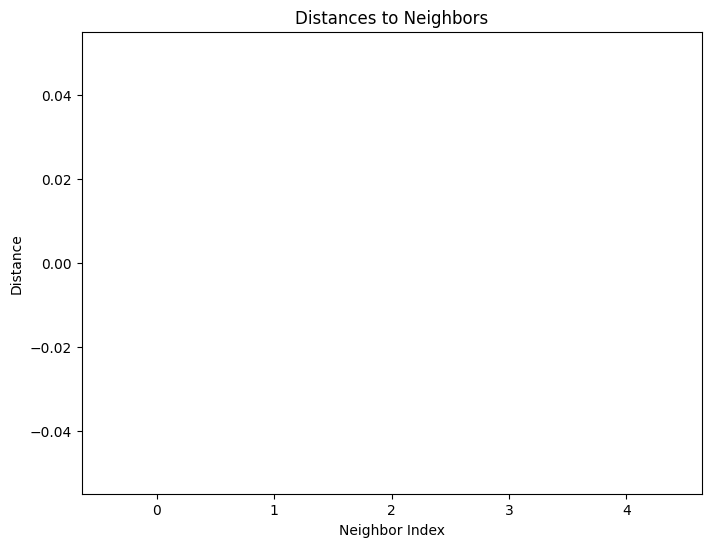

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Fit a Nearest Neighbors model
nn = NearestNeighbors(n_neighbors=5, metric='euclidean')
nn.fit(X_train_scaled)

# Find the neighbors of a specific point
sample_point = X_train_scaled[0]
distances, indices = nn.kneighbors([sample_point])

# Plot the distances
plt.figure(figsize=(8, 6))
plt.bar(range(len(distances[0])), distances[0])
plt.xlabel('Neighbor Index')
plt.ylabel('Distance')
plt.title('Distances to Neighbors')
plt.show()

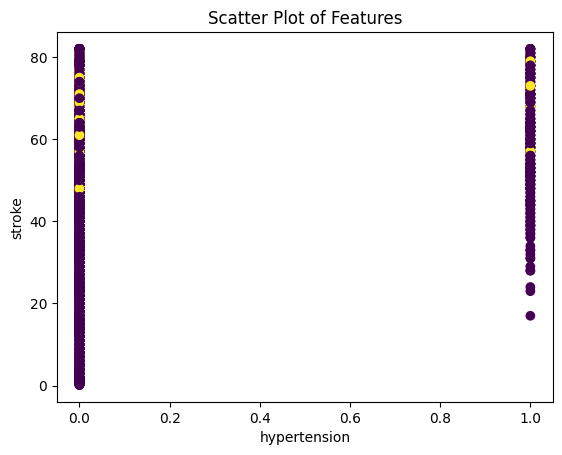

In [ ]:
import matplotlib.pyplot as plt

# Example for two features
plt.scatter(X_train['hypertension'], X_train['age'], c=y_train, cmap='viridis')
plt.xlabel('hypertension')
plt.ylabel('stroke')
plt.title('Scatter Plot of Features')
plt.show()

PCA

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['stroke'])
y = data['stroke']


In [ ]:
# Select the features (columns) to include in PCA
selected_features = data[['stroke', 'heart_disease', 'age']]

In [ ]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

In [ ]:
# Perform PCA
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(selected_features_scaled)

In [ ]:
# Create a DataFrame to store the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.47793387 0.28852724]


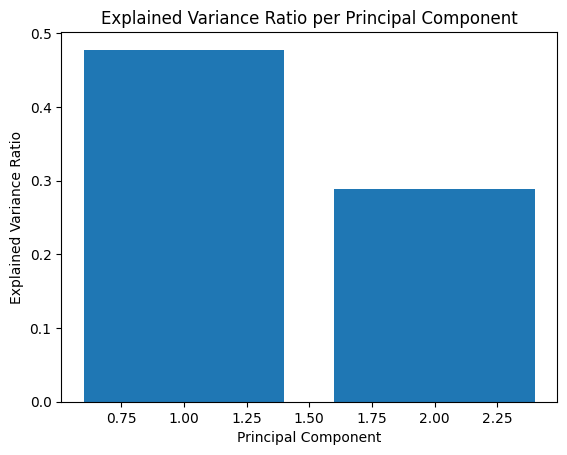

In [ ]:
# Plot the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()